In [1]:
import rasterio
import numpy as np
import matplotlib as mpl
import subprocess
from matplotlib import pyplot
from rasterio.merge import merge
import geopandas as gpd

## Calculate WRI

In [2]:
import os, math

for root, dir, filenames in os.walk('MERGED/'):
    for folder in dir:
        path = os.path.join('MERGED', folder)
        listFile = [path + '/B2.TIF',
                   path + '/B3.TIF',
                   path + '/B4.TIF',
                   path + '/B5.TIF']
        G, R, N, M= (rasterio.open(f) for f in listFile)
        
        meta = N.meta
        meta['dtype'] = 'float32'
        
        print("Processing %s" % path)
        G = G.read(1)
        R = R.read(1)
        N = N.read(1)
        M = M.read(1)

        WRI = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(WRI.shape[0]):
            for j in range(WRI.shape[1]):
                g = G[i,j].astype(float)
                r = R[i,j].astype(float)
                n = N[i,j].astype(float)
                m = M[i,j].astype(float)
                WRI[i,j] = (g + r) / (n + m)
                if math.isnan(WRI[i,j]):
                    WRI[i,j] = 1
        with rasterio.open(path + '/WRI.TIF', 'w', **meta) as dst:
            dst.write(WRI, 1)

Processing MERGED/20130301


/home/anhldt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/home/anhldt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars


KeyboardInterrupt: 

## Calculate NDVI

In [ ]:
import os, math

for root, dir, filenames in os.walk('MERGED/'):
    for folder in dir:
        path = os.path.join('MERGED', folder)
        listFile = [path + '/B5.TIF',
                   path + '/B4.TIF']
        bandNIR, bandRed = (rasterio.open(f) for f in listFile)
        
        meta = bandNIR.meta
        meta['dtype'] = 'float32'
        
        print("Processing %s" % path)
        bandNIR = bandNIR.read(1)
        bandRed = bandRed.read(1)

        NDVI = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(NDVI.shape[0]):
            for j in range(NDVI.shape[1]):
                nir = bandNIR[i,j].astype(float)
                red = bandRed[i,j].astype(float)
                NDVI[i,j] = (nir - red) / (nir + red)
                if math.isnan(NDVI[i,j]):
                   NDVI[i,j] = 1
        with rasterio.open(path + '/NDVI.TIF', 'w', **meta) as dst:
            dst.write(NDVI, 1)


## Calculate NDWI

In [ ]:
import os, math

for root, dir, filenames in os.walk('MERGED/'):
    for folder in dir:
        path = os.path.join('MERGED', folder)
        listFile = [path + '/B4.TIF',
                   path + '/B2.TIF']
        bandNIR, bandGreen = (rasterio.open(f) for f in listFile)
        
        meta = bandNIR.meta
        meta['dtype'] = 'float32'
        
        print("Processing %s" % path)
        bandNIR = bandNIR.read(1)
        bandGreen = bandGreen.read(1)

        NDWI = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(NDWI.shape[0]):
            for j in range(NDWI.shape[1]):
                nir = bandNIR[i,j].astype(float)
                green = bandGreen[i,j].astype(float)
                NDWI[i,j] = (green - nir) / (green + nir)
                if math.isnan(NDWI[i,j]):
                   NDWI[i,j] = -1
        with rasterio.open(path + '/NDWI.TIF', 'w', **meta) as dst:
            dst.write(NDWI, 1)

## Calculate NDWI 2

In [ ]:
import os, math

for root, dir, filenames in os.walk('MERGED/'):
    for folder in dir:
        path = os.path.join('MERGED', folder)
        listFile = [path + '/B5.TIF',
                   path + '/B2.TIF']
        bandSWIR, bandGreen = (rasterio.open(f) for f in listFile)
        
        meta = bandSWIR.meta
        meta['dtype'] = 'float32'
        
        print("Processing %s" % path)
        bandSWIR = bandSWIR.read(1)
        bandGreen = bandGreen.read(1)

        NDWI2 = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(NDWI2.shape[0]):
            for j in range(NDWI2.shape[1]):
                swir = bandSWIR[i,j].astype(float)
                green = bandGreen[i,j].astype(float)
                NDWI2[i,j] = (green - swir) / (green + swir)
                if math.isnan(NDWI2[i,j]):
                    NDWI2[i,j] = -1
        with rasterio.open(path + '/NDWI2.TIF', 'w', **meta) as dst:
            dst.write(NDWI2, 1)

## Calculate WKT

In [ ]:
import os, math

for root, dir, filenames in os.walk('MERGED/'):
    for folder in dir:
        path = os.path.join('MERGED', folder)
        listFile = [path + '/B1.TIF',
                   path + '/B2.TIF',
                   path + '/B3.TIF',
                   path + '/B4.TIF',
                   path + '/B5.TIF',
                   path + '/B7.TIF']
        B, G, R, N, M, S = (rasterio.open(f) for f in listFile)
        
        meta = B.meta
        meta['dtype'] = 'float32'
        
        print("Processing %s" % path)
        B = B.read(1)
        G = G.read(1)
        R = R.read(1)
        N = N.read(1)
        M = M.read(1)
        S = S.read(1)

        WKT = np.zeros(rasterio.open(listFile[0]).shape, dtype=rasterio.float32)
        for i in range(WKT.shape[0]):
            for j in range(WKT.shape[1]):
                b = B[i,j].astype(float)
                g = G[i,j].astype(float)
                r = R[i,j].astype(float)
                b = N[i,j].astype(float)
                m = M[i,j].astype(float)
                s = S[i,j].astype(float)
                WKT[i,j] = 0.1509*b + 0.1793*g + 0.3279*r + 0.3406*n - 0.7112*m - 0.4572*s;
        with rasterio.open(path + '/WKT.TIF', 'w', **meta) as dst:
            dst.write(WKT, 1)

### Show

In [27]:
geotiffPath = 'MERGED/20130301/'
NDVI = rasterio.open(geotiffPath + 'NDVI.TIF')
NDWI = rasterio.open(geotiffPath + 'NDWI.TIF')
NDWI2 = rasterio.open(geotiffPath + 'NDWI2.TIF')
WKT = rasterio.open(geotiffPath + 'WKT.TIF')

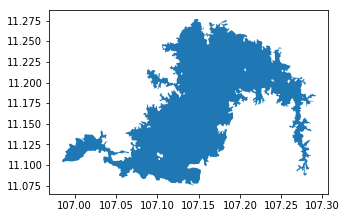

In [23]:
from matplotlib import pyplot as plt
vn_reservoirs_path = 'vnreservoirs/VN_Reservoirs.shp'
df = gpd.read_file(vn_reservoirs_path)
plt.rcParams['figure.figsize'] = 5, 5
ho_tri_an = df[df.AREA_SKM == 277.4]
ho_tri_an.plot()

In [25]:
from rasterio.crs import CRS
from rasterio.warp import transform_geom
import rasterio.mask

from shapely.geometry import shape, mapping, Polygon, MultiPolygon
from descartes import PolygonPatch

In [28]:
raw_file = NDVI
trans = raw_file.transform

ho_tri_an_shape = ho_tri_an.geometry.values[0]
ho_tri_an_geom = mapping(ho_tri_an_shape)
ho_tri_an_shape = [transform_geom(df.crs, raw_file.crs,ho_tri_an_geom)]

/home/anhldt/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
inf = float("inf")
x0, y0, x1, y1 = [inf, -inf, -inf, inf] #top-left, bottom-right
for x, y in ho_tri_an_shape[0]['coordinates'][0]:
    if x0 > x:
        x0 = x
    if x1 < x:
        x1 = x
    if y0 < y:
        y0 = y
    if y1 > y:
        y1 = y
new_coordinates = [{'type': 'Polygon', 'coordinates': [[(x0-1000, y0+1000),(x1+1000, y0+1000), 
                                                        (x1+1000, y1-1000), (x0-1000, y1-1000)]]}]
ndvi, _ = rasterio.mask.mask(NDVI, new_coordinates, crop=True)
ndwi, _ = rasterio.mask.mask(NDWI, new_coordinates, crop=True)
ndwi2, _ = rasterio.mask.mask(NDWI2, new_coordinates, crop=True)
wkt, _ = rasterio.mask.mask(WKT, new_coordinates, crop=True)

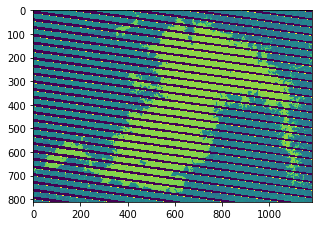

In [33]:
ndwi2 = ndwi2.squeeze()
pyplot.imshow(ndwi2)

In [36]:
def insideMatrix(x, y, m, n):
    if x < 0 or x >= m or y < 0 or y >= n:
        return False
    return True

In [37]:
def check_expansion(val, type_of_map):
    if (type_of_map == 'NDVI'):
        if (val < 0):
            return True;
        return False;
    if (type_of_map == 'NDWI'):
        if (val > 0):
            return True;
        return False;
    if (type_of_map == 'NDWI2'):
        if (val > 0):
            return True;
        return False;  
    return null;

In [43]:
def count_pixel(obj, type_of_map, startingPoint):
    from queue import Queue
    dx = [0,1,0,-1]
    dy = [1,0,-1,0]

    visited = np.zeros((obj.shape[0], obj.shape[0])).astype('bool')
    final_obj= np.zeros((obj.shape[0], obj.shape[1]))

    u0, v0 = startingPoint[0], startingPoint[1]

    q = Queue()
    q.put((u0, v0))
    visited[u0, v0] = True
    countPixel = 0

    while not q.empty():
        u, v = q.get()
        final_obj[u, v] = -1
        countPixel += 1
        for k in range(4):
            _u, _v = u + dx[k], v + dy[k]
            if not insideMatrix(_u, _v, obj.shape[0], obj.shape[1]): 
                continue
            if check_expansion(obj[_u, _v], type_of_map) and not visited[_u, _v]:
                visited[_u, _v] = True
                q.put((_u, _v))
    pyplot.imshow(final_obj)
    return countPixel

7523

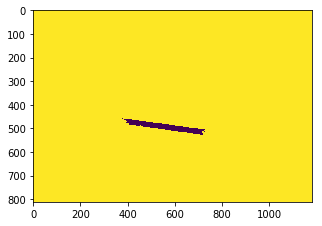

In [56]:
count_pixel(ndwi2, 'NDWI2', [500, 600])